In [32]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC


from sklearn.datasets import load_breast_cancer

In [28]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svc  = SVC().fit(X_train_scaled,y_train)

print('Test Accuracy' , svc.score(X_test_scaled,y_test))

Test Accuracy 0.951048951049


In [29]:
param_grid = {'gamma':[0.001,0.01,0.1,1,10],
             'C': [0.001,0.01,0.1,1,10]}

grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5)

grid.fit(X_train_scaled,y_train)
print('Accuracy',grid.score(X_test_scaled,y_test) )
print('Best Paramters ',grid.best_params_)

Accuracy 0.972027972028
Best Paramters  {'C': 1, 'gamma': 1}


<IPython.core.display.Javascript object>


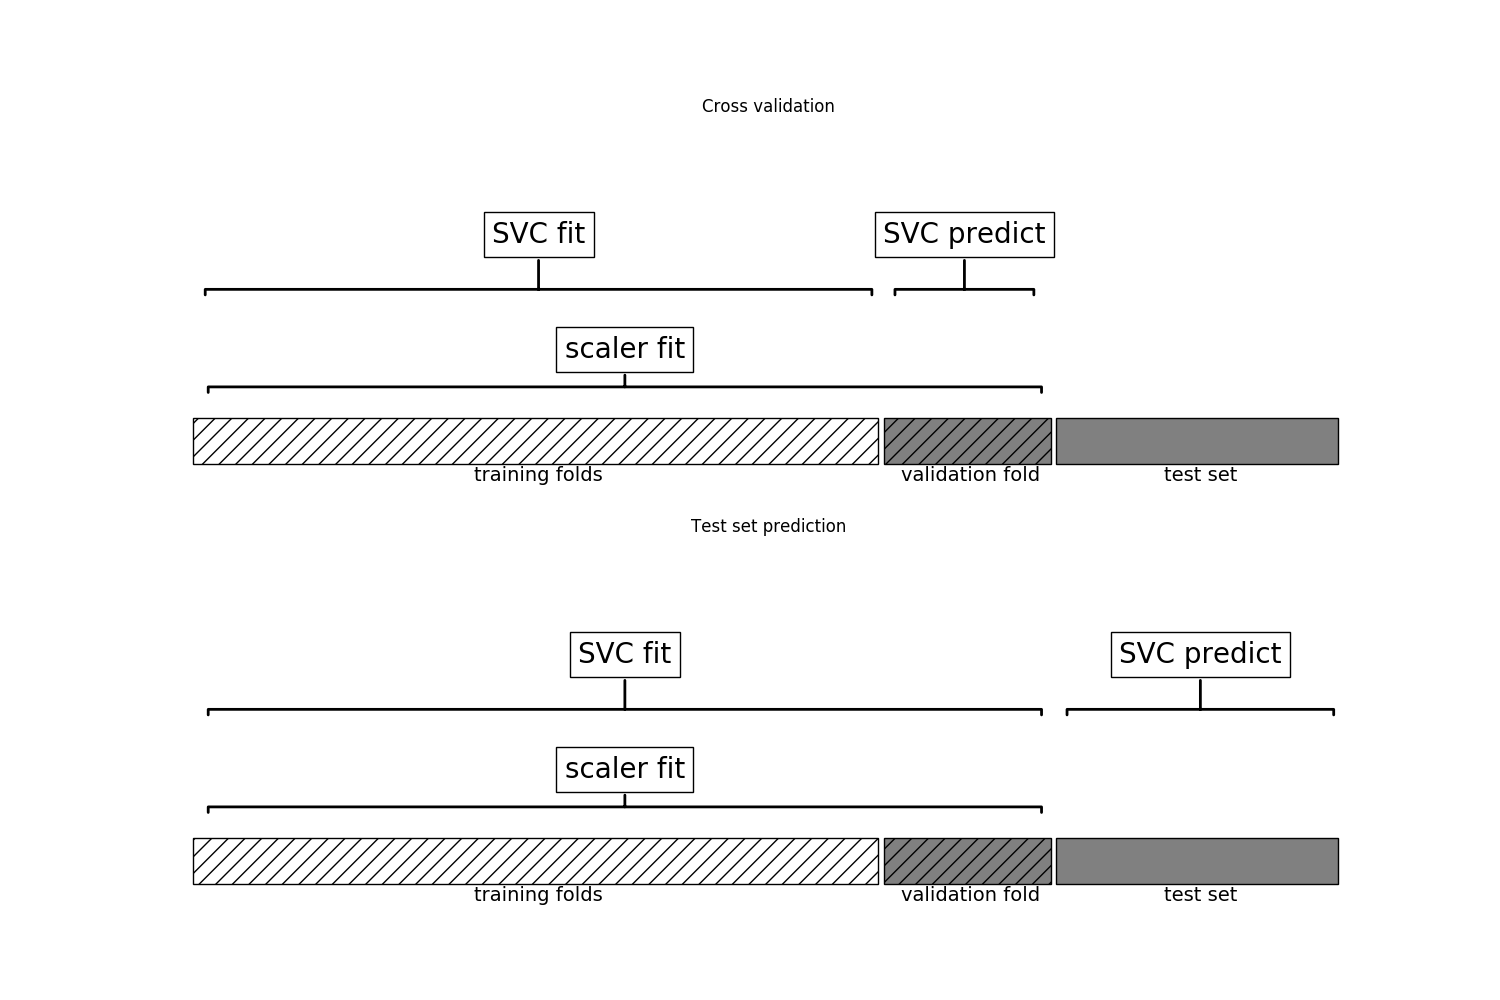

In [34]:
mglearn.plots.plot_improper_processing()

<IPython.core.display.Javascript object>


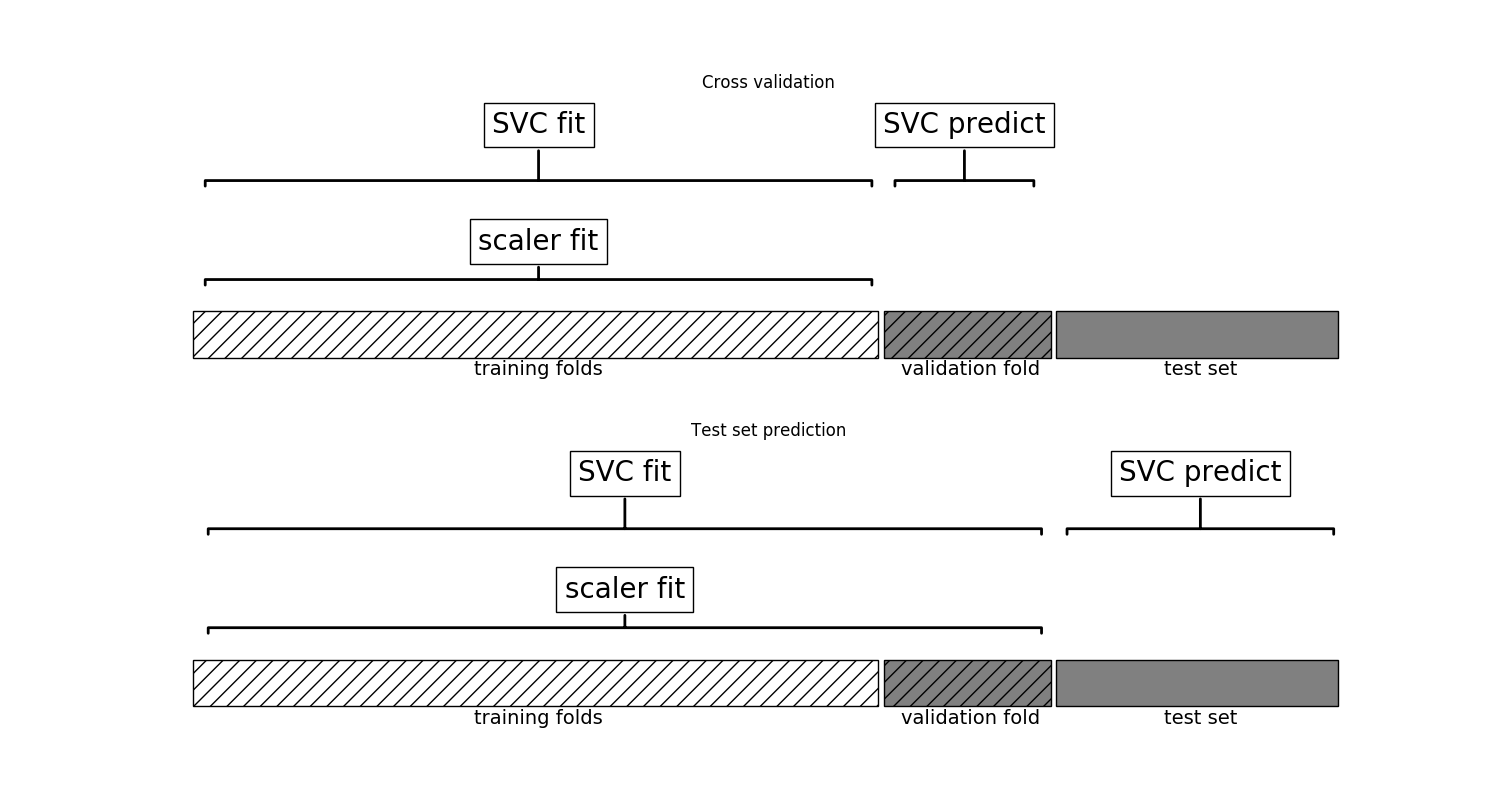

In [35]:
mglearn.plots.plot_proper_processing()

## Building Pipelines

In [48]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler',MinMaxScaler()),('svm',SVC())])

In [49]:
pipe.fit(X_train,y_train)
print('Test Score',pipe.score(X_test,y_test))

Test Score 0.951048951049


In [50]:
param_grid ={'svm__C':[0.001,0.01,0.1,1,10,100],
             'svm__gamma':[0.001,0.01,0.1,1,10,100]
            }

In [52]:
grid = GridSearchCV(pipe,param_grid=param_grid,cv =5)
grid.fit(X_train,y_train)
print('Best cross val score',grid.best_score_)
print("Best parameters",grid.best_params_)
print('Test Acuuracy',grid.score(X_test,y_test))

Best cross val score 0.981220657277
Best parameters {'svm__C': 1, 'svm__gamma': 1}
Test Acuuracy 0.972027972028


## Alternative way to write pipeline

In [55]:
from sklearn.pipeline import make_pipeline
pipe_long = Pipeline([('scaler',MinMaxScaler()),('svm',SVC(C=100))])

## short form 
pipe_short= make_pipeline(MinMaxScaler(),SVC(C=100))

In [56]:
pipe_short.steps

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(),PCA(n_components=2),StandardScaler())
pipe.steps

[('standardscaler-1',
  StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('standardscaler-2',
  StandardScaler(copy=True, with_mean=True, with_std=True))]

##### Acessing Step Attributes


In [63]:
pipe.fit(cancer.data)

components= pipe.named_steps['pca'].components_

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
pipe = make_pipeline(StandardScaler(),LogisticRegression())


In [70]:
param_grid={'logisticregression__C':[0.01,0.1,1,10,100]}
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=4)
grid = GridSearchCV(pipe,param_grid,cv=5)
grid.fit(X_train,y_train);

In [78]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [83]:
grid.best_estimator_.named_steps['logisticregression'].coef_

array([[-0.38856355, -0.37529972, -0.37624793, -0.39649439, -0.11519359,
         0.01709608, -0.3550729 , -0.38995414, -0.05780518,  0.20879795,
        -0.49487753, -0.0036321 , -0.37122718, -0.38337777, -0.04488715,
         0.19752816,  0.00424822, -0.04857196,  0.21023226,  0.22444999,
        -0.54669761, -0.52542026, -0.49881157, -0.51451071, -0.39256847,
        -0.12293451, -0.38827425, -0.4169485 , -0.32533663, -0.13926972]])

 ## Grid Searching Preprocessing Steps

In [86]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
boston = load_boston()

X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(),Ridge())

In [87]:
param_grid = {'polynomialfeatures__degree':[1,2,3],
             'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

In [89]:
grid = GridSearchCV(pipe , param_grid=param_grid,cv = 5,n_jobs=-1)
grid.fit(X_train,y_train);

<IPython.core.display.Javascript object>


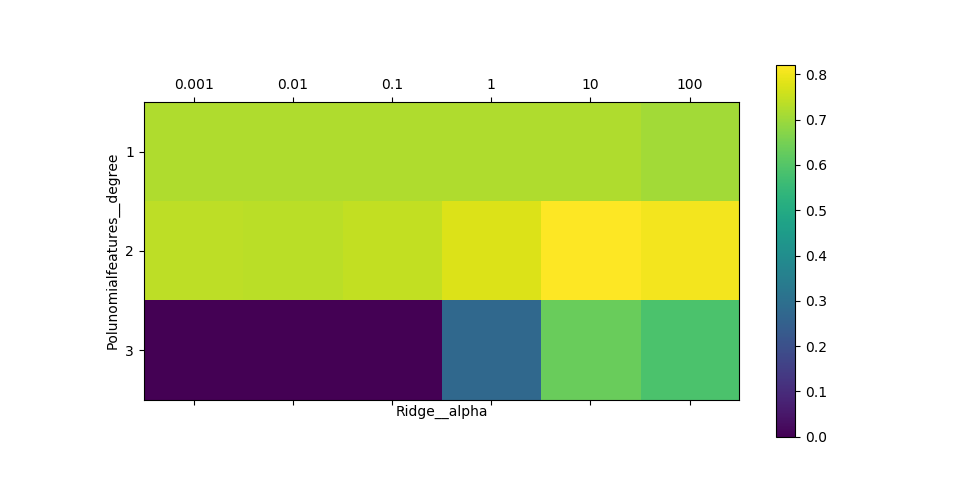

([<matplotlib.axis.YTick at 0x1fa9133a90>,
 <a list of 3 Text yticklabel objects>)

In [107]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3,-1),vmin=0)
plt.xlabel('Ridge__alpha')
plt.ylabel('Polunomialfeatures__degree')
plt.colorbar()
plt.xticks(range(len(param_grid['ridge__alpha'])),param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),param_grid['polynomialfeatures__degree']);

In [108]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

In [109]:
grid.score(X_test,y_test)

0.76735803503061795

## Grid Searching which model to use

In [130]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [
             {'classifier':[SVC()] , 'preprocessing':[StandardScaler(),None],
              'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
              },
              {'classifier':[RandomForestClassifier(n_estimators = 100)],
               'preprocessing':[None],
               'classifier__max_features':[1,2,3]
              }
             ]

In [131]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
X_train,X_test,y_train,y_test =train_test_split(cancer.data,cancer.target,random_state=0)
grid = GridSearchCV(pipe ,param_grid,cv =5 )
grid.fit(X_train,y_train);

In [132]:
grid.best_params_

{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'classifier__C': 10,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [135]:
grid.score(X_test,y_test)

0.97902097902097907